In [25]:
import os
import numpy as np
import pandas as pd

import Augmentor 
import utils

## load dataset

In [2]:
dataset_dir = 'flower_images'
df  = pd.DataFrame.from_csv(os.path.join(dataset_dir,'flower_labels.csv'))
df['name'] = df.index
df['path'] = dataset_dir + '/' + df['name']
df

/home/fytroo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,label,name,path
file,,,
0001.png,0,0001.png,flower_images/0001.png
0002.png,0,0002.png,flower_images/0002.png
0003.png,2,0003.png,flower_images/0003.png
0004.png,0,0004.png,flower_images/0004.png
0005.png,0,0005.png,flower_images/0005.png
0006.png,1,0006.png,flower_images/0006.png
0007.png,6,0007.png,flower_images/0007.png
0008.png,0,0008.png,flower_images/0008.png
0009.png,0,0009.png,flower_images/0009.png


### split dataset into train data and test data for cross validation

In [3]:
df_train, df_test = utils.train_test_split_df(df, test_size=0.1)
x_train, y_train = utils.load_fromdf(df_train, resize=(28,28))
x_test, y_test = utils.load_fromdf(df_test, resize=(28,28))
n_label = df['label'].drop_duplicates().count()
n_label

10

In [4]:
df_test

,label,name,path
0,0,0010.png,flower_images/0010.png
1,1,0210.png,flower_images/0210.png
2,2,0021.png,flower_images/0021.png
3,3,0150.png,flower_images/0150.png
4,4,0142.png,flower_images/0142.png
5,5,0037.png,flower_images/0037.png
6,6,0197.png,flower_images/0197.png
7,7,0047.png,flower_images/0047.png
8,8,0175.png,flower_images/0175.png
9,9,0141.png,flower_images/0141.png


In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((200, 96, 96, 3), (200,), (10, 96, 96, 3), (10,))

In [13]:
p = Augmentor.Pipeline()
p.flip_left_right(probability=0.5)
p.flip_top_bottom(probability=0.5)
p.rotate(probability=0.5, max_left_rotation=5, max_right_rotation=5)
p.random_erasing(probability=0.5, rectangle_area=0.2)
p.status()
g = p.keras_generator_from_array(x_train, y_train, batch_size=32)

Operations: 4
	0: Flip (probability=0.5 top_bottom_left_right=LEFT_RIGHT )
	1: Flip (probability=0.5 top_bottom_left_right=TOP_BOTTOM )
	2: RotateRange (probability=0.5 max_left_rotation=-5 max_right_rotation=5 )
	3: RandomErasing (probability=0.5 rectangle_area=0.2 )
Images: 0
Classes: 0

You can remove operations using the appropriate index and the remove_operation(index) function.


In [16]:
xs, ys = batch = next(g)
xs.shape, ys.shape

((32, 96, 96, 3), (32,))

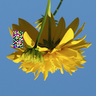

In [17]:
utils.arr2img(xs[2])

##### (channels, height, width) in Chainer or PyTorch, <br/> unlike (height, width, channels) in TensorFlow

##### So, transform ( batch, height, width, channels ) to ( batch, channels, height, width ) 

In [26]:
g_chainer = (( 
    np.array(np.swapaxes((x/255.), 1, 3)).astype(np.float32),
    np.array(y.astype(np.int8))
    ) for (x,y) in g)

In [27]:
xs, ys = batch = next(g_chainer)
xs.shape, ys.shape

((32, 3, 96, 96), (32,))